In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
iris = pd.read_csv("iris.csv")

<img src ="iris_with_labels.jpg"/>

In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
#How many data points and features are ther ?
iris.shape 

(150, 5)

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [9]:
iris['species'].value_counts()
#iris is a balanced dataset


versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

# 2-D SCATTER PLOT

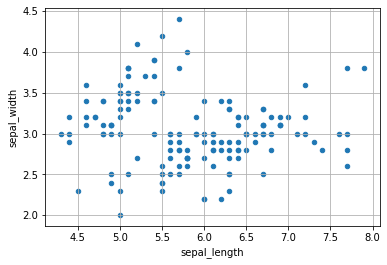

In [9]:
#always understand the axis : labels and scale

iris.plot(kind='scatter',x='sepal_length',y='sepal_width')

plt.grid()

#this plot do not has origin 0,0
#this is 2 d 

In [10]:
#color these points on basis of which class they belong to 

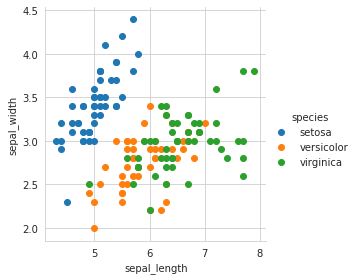

In [13]:
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue = "species", size =4 ) \
.map(plt.scatter, "sepal_length", "sepal_width") \
.add_legend()
#hue = "species" means color on the basis of species columns

# Observations
1. Using the sepal_length and sepal_width feature , we can distinguish the class Setosa and (Virginica or Versicolor)


2 .Separting Versicolor and virginica is quite hard ,a sthey have  considerable overlap

# 3-D SCATTER PLOT

https://plot.ly/pandas/3d-scatter-plots/

# pair plot 


As we humnas cannot visulize space more than 3 dimensional , we use pair plot to visulzise these datas 

Dis-Advantages of pair plot ; 


1) cannot  visualize when very higher dimensions


2) only possible to view 2d patters



/home/prajin/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


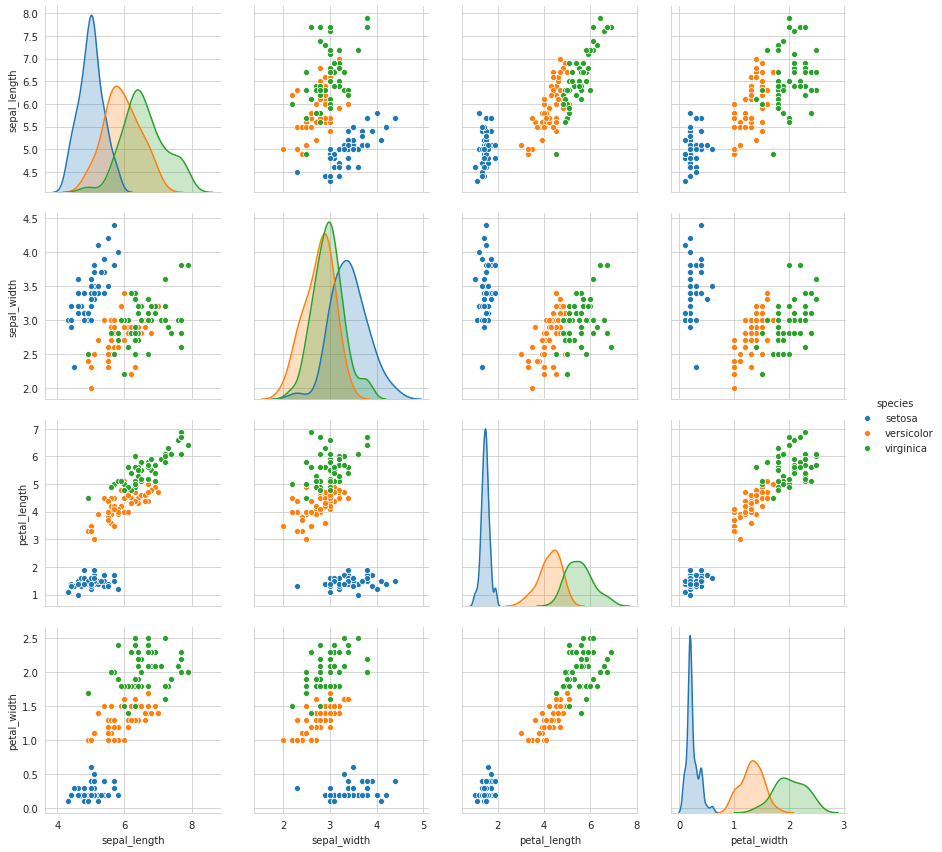

In [14]:
plt.close()
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(iris, hue="species", size =3)
plt.show()
#Note - the diagonal elements are PDFs for each feature # later 

Observations ?

# Histogram, PDF, CDF

In [1]:
import numpy as np

1d Scatter plot

In [18]:
iris_setosa = iris.loc[iris['species']=="setosa"];
iris_setosa.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris_virginica = iris.loc[iris['species']=='virginica']
iris_virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [20]:
iris_versicolor = iris.loc[iris['species']=='versicolor']

In [21]:
iris_versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


No handles with labels found to put in legend.


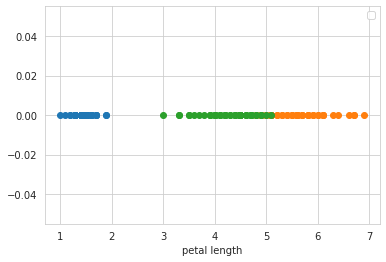

In [23]:
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']),'o')
plt.plot(iris_virginica["petal_length"],np.zeros_like(iris_virginica['petal_length']), 'o')
plt.plot(iris_versicolor['petal_length'],np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.xlabel("petal length")
plt.legend() 

#histogram - a x -y plot which represents how many values / counts are there.

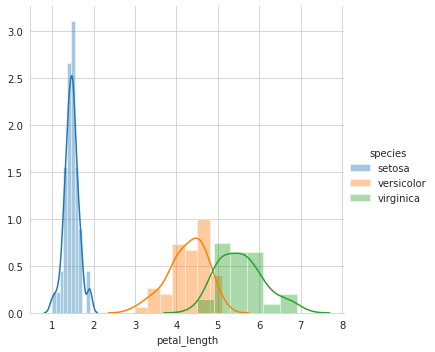

In [25]:
sns.FacetGrid(iris, hue="species", size =5 )\
.map(sns.distplot, "petal_length")\
.add_legend()

light blue is the histogram of petal_length os setosa flower

orange is the histogram of petal_length of versicolor flower

green ins the histogram of petal_length of virginica flower

for instance for setosa(light blue ) , we find most petal length to be around 1.5 as 1.5 repeats most 

the smooth curve is called probability desnity function (pdf ) - smooth form of histogram

# Cummulative Distribution fucntion

[0.22222222 0.22222222 0.44444444 1.55555556 2.66666667 3.11111111
 1.55555556 0.88888889 0.         0.44444444]


11.11111111111111
[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
/n
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


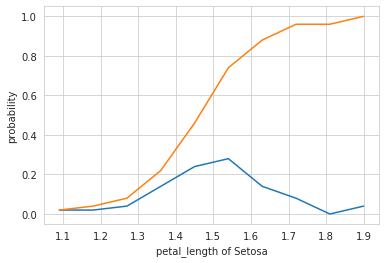

In [37]:
#need for cdf
#we can visually see what percentage of versicolor flowe have petal length less than 1.6
#how to construct a cdf
#how to read a cdf
import numpy as np
#plot cdf of petal_length


counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins =10, 
                                density = True)
print(counts)

print("\n")

print(sum(counts))

pdf = counts / (sum(counts))
print(pdf)
print("/n")
print(bin_edges)

#computing cdf

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf);
plt.plot(bin_edges[1:], cdf);
plt.xlabel("petal_length of Setosa")
plt.ylabel("probability")
plt.show();

In [28]:
#what pdf represents is 
  #1) in the region between 1.5 and 1.6 about 20% of our points lies 
  #2) in the region between 1.2 and 1.3 , about less than 10% point lies 


#what cdf represent if 
 #1) taking value 1.6, there are 82% of setosa flowers that has petal_length <= 1.6

[0.02 0.02 0.04 0.14 0.24 0.28 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


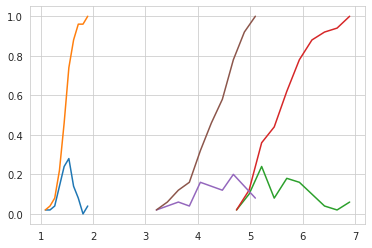

In [42]:
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins =10, density = True)
pdf = counts / (sum(counts));
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins =10, density = True)
pdf = counts / (sum(counts));
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins =10, density = True)
pdf = counts / (sum(counts));
print(pdf);
print(bin_edges);

cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)


#by using the pdf and pdf plot, 
 if petal_length is less than 2 , then setosa 
 
 elif petal_length is >2 and <= 5, then virginica 
 
 elif petal_length >2 and <5 , then versicolor, 
    
    here we can tell 
    we will be able to classify our model 100% corect for setosa 
    we will be 95% correct for virginica 
    we will be 90% corrent for versicolor

# Mean , Variance and Standard Deviation 

In [21]:
print("Means:")
print(np.mean(iris_setosa['petal_length']))
#mena with an outlier
print(np.mean(np.append(iris_setosa['petal_length'], 50)))

print(np.mean(iris_virginica['petal_length']))
print(np.mean(iris_versicolor['petal_length']))

print("Standard Deviation")

print(np.std(iris_setosa['petal_length']))
print(np.std(iris_virginica['petal_length']))
print(np.std(iris_versicolor['petal_length']))

Means:
1.464
2.4156862745098038
5.5520000000000005
4.26
Standard Deviation
0.17176728442867112
0.546347874526844
0.4651881339845203


from the above mena and standard deviation we can tell that :

    1) most of my setosa flowers , petal lengh lies betweeen, 1.464-0.17 and 1.464+0.17
    
    2) most of my virginica flowers, petal length lies betwwen , 2.41-0.54 and 2.41 + 0.54 
    and similarly for versicolor

# Median ,Percentile, Quantile, IQR, MAD

In [22]:
#medians, Quantiles, PErcentile, IQR
print("\n Medians")
print(np.median(iris_setosa['petal_length']))
#median with outlier
print(np.median(np.append(iris_setosa['petal_length'],50)))
print(np.median(iris_virginica['petal_length']))
print(np.median(iris_versicolor['petal_length']))



 Medians
1.5
1.5
5.55
4.35


In [23]:
print("Quantiles \n")
print(np.percentile(iris_setosa['petal_length'], np.arange(0,100,25)))
print(np.percentile(iris_virginica['petal_length'], np.arange(0,100,25)))
print(np.percentile(iris_versicolor['petal_length'], np.arange(0,100,25)))


Quantiles 

[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [24]:
print("90th percentile \n")
print(np.percentile(iris_setosa['petal_length'], 90))
print(np.percentile(iris_virginica['petal_length'], 90))
print(np.percentile(iris_versicolor['petal_length'], 90))

90th percentile 

1.7
6.3100000000000005
4.8


In [25]:
from statsmodels import robust
print("\n Mena Absolute deviation")
print(robust.mad(iris_setosa['petal_length']))
print(robust.mad(iris_virginica['petal_length']))
print(robust.mad(iris_versicolor['petal_length']))


 Mena Absolute deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


#optional 



# Box plot and whiskers

Histograms are not able to giv eth answrs for percentile ,quantiles value 

In [26]:
#box - plot with whiskers, another metohd of visualizing the 1-d scatter plt,
# the concept of media, percentile and quantile
#how to draw boz plot ?
#how to draw whiskers, there is no standard way, we could use min , max or other 
#IQR like idea 

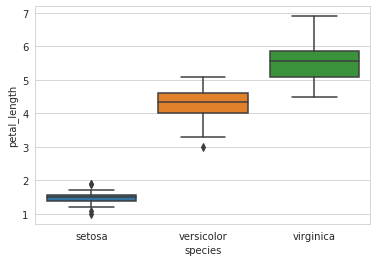

In [27]:
sns.boxplot(x='species', y='petal_length', data=iris)

# Violin plots

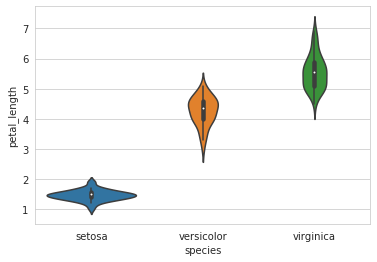

In [28]:
#combines box plot and histograms

#denser regiosn of the data are farther and sparser ones are thinner, in a violin lot 

sns.violinplot(x='species', y='petal_length', data = iris, size =8)

# Multivariate Probability Desnsity, Contour plot

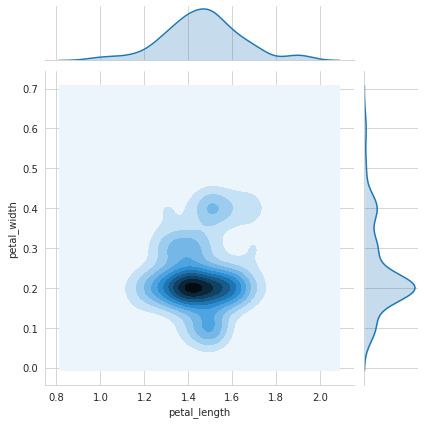

In [29]:
#2d density, contors-plot

sns.jointplot(x='petal_length', y='petal_width', data=iris_setosa, kind='kde')

#this plot says , the dark part has more data points and liger color has few  data points
#1d denstiy is pdf
#2d density is contour density